# Lecture - What are Hidden Markov Models (HMMs)?


Hidden Markov Models is a type of generative modelling technique, where the underlying process is assumed to be a Markov process with hidden states. The key property of the Markov process is that each event only depends on the previous state.

## **Why are we discussing them?**

At the time of writing these notes, HMM-DNN models are still the state of the art techniques for speech recognition. They have been superseded by WaveNet for speech synthesis only recently. This means we should spend a little time in order to understand these systems, or potentially develop them.


## Mathematical scope

We are going to discuss Markov chains that are discrete in time and state too. Mathematical detail is kept as brief as it is possible.

A Markov chain consists of a transition matrix $ A_{ij} $, an initial probability distribution $ \pi $. These are sufficient to describe an evolution of Markov chain. 

Consider a 2-state Markov chain for example. It could be described by,

$$ A = \begin{bmatrix}0.2 & 0.5\\0.8 & 0.5\end{bmatrix} \quad \pi = \begin{bmatrix} 0.1 \\ 0.9 \end{bmatrix} $$ 





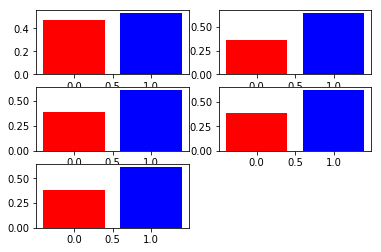

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import time

A = np.array([[0.2,0.5],[0.8,0.5]])
start = np.array([[0.1],[0.9]])
state = start

T = 6
for t in range(1,T):
  state = np.dot(A,state)
  plt.subplot(int(T/2),2,t)
  plt.bar(np.array([0,1]),state[:,0],color=["r","b"])
  



## Stationary distributions

Under certrain conditions for a Markov chain, its stationary distribution can be calculated. The stationary distribution is the distribution the Markov chain "tends to" after some amount of time. 

But how can we calculate this? We have seen that $ \mathbf{A} \mathbf{v}_{t} = \mathbf{v}_{t+1} $ is the rule to calculate one step in the evolution. We are looking for the case, where

$$ \mathbf{A} \mathbf{v}_{t} = \mathbf{v}_{t}. $$

You might remember seeing this equation in a different form somewhere else, like this

$$ \mathbf{A} \mathbf{v} = \lambda \mathbf{v}, $$

which is called the eigenvalue equation. Indeed the stationary distribution is the eigenvector of the transition matrix corresponding to an eigenvalue of $ \lambda = 1 $.




## Graphical representation

Markov chains are often represented using this kind of graphical representation. The nodes represent the states and the edges represent the transition probabilities.

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/Finance_Markov_chain_example_state_space.svg/400px-Finance_Markov_chain_example_state_space.svg.png)


Q: Can you construct the transition probablity matrix based on this diagram?


## Hidden Markov models

The only difference between Markov chains and hidden Markov models now is that the **states of the HMM are not directly observed**, instead the underlying states emit the phenomenon that we observe. 

![HMM example](https://miro.medium.com/max/1200/1*0xjHjL19uK0d6llcEJ0Z0w.png)

In the graph above, we can see that there are two states: **rainy** and **sunny**. These are statements about a weather on any given day. As previously, the normal edges indicate the transition probabilities. For example, given a rainy day, there is a 0.7 probability it will be a rainy day again.

The dashed lines indicate activities that we might do depending the weather. These are the activities that we observe: walking, shopping and cleaning. Similarly to the state transition, the events that happen based on these states are not deterministic. These events probabilities are called **emission probabilities**.



## Basic inference mechanics

We are not going to be able to cover Forward-Backward, Baum-Welch and Viterbi algorithm for HMM inference. 


*   There are extensive derivations for these algorithms in the literature, I will give reference too.
*   The reward for the intellectual challenge of understanding these algorithms is however not great enough. It is very rare, that someone does not use an out-of-box inference solution for HMMs.
* What makes sense however is to look at a few examples of simpler inference, and point out where difficulties arise.




### Find out probability of an observation

$$ P(X_2 = \text{shopping}) = ? $$

We know that this could have happened two ways

$$ P(X_2 = \text{sh}) = P(X_2 = \text{sh} | Z_2 = \text{r} ) + P(X_2 = \text{sh} | Z_2 = \text{s} ) $$

Now, we can use the Markovian mechanics for modelling the transitions. We will assume an initial distribution $ P(Z_1) = [0.5,0.5] $ 


To avoid lengthy calculations, we can just evolve the transition matrix one-step ahead first by,

$$ A = \begin{bmatrix}0.7 & 0.4\\0.3 & 0.6\end{bmatrix}  \begin{bmatrix}0.5 \\ 0.5\end{bmatrix} = \begin{bmatrix}0.55 \\ 0.45\end{bmatrix} = \begin{bmatrix}P(Z_2=r) \\ P(Z_2=s)\end{bmatrix} $$ 

Now, we can calculate the emission probabilities,

$$ P(X_2 = \text{sh}) = P(X_2 = \text{sh} | Z_2 = \text{r} ) + P(X_2 = \text{sh} | Z_2 = \text{s} ) = 0.4 \cdot 0.55 + 0.3 \cdot 0.45 = 0.355 $$ 

## But how can I predict my words using this setup?

Using generatives models such as HMM requires a shift in our understanding. What we most often do, i.e with a linear classifier is the following:

$$ w^Tx = y \quad \begin{cases} 1 \quad y \geq 0.5 \\ 0 \quad y < 0.5  \end{cases} $$

For multiclass problems, however this is not sufficient. As you may know, what a neural network often does is to output a probability distribution at the last layer, i.e. for digit classification it would look like:

$$ [0.1, 0.1, 0.1, 0.5, 0.05, 0.05, 0.05,0.05, 0, 0] $$

which would mean that we should classify our example as a 3 in this case.

A generative model is more similar to that. Following the inference mechanics above, we can train **one model for each word**. 

The results of each generative model can be then incorporated into a vector like the one above.








## Duration modelling

Our previous example of HMM is not one that is actually used in speech recognition. All models used for speech recognition are so called left-to-right HMMs. 


![From David Weenink's lecture notes](https://i.imgur.com/eAKmcIt.png)



Q: Can you figure out why they are called left-to-right HMMs?

Apart from the left-to-right directions however, self-transitions are also allowed. This is useful for modelling durations as we expect that the calculated features that we are observing do not change between succesive time-intervals that much. (**quasi-stationary assumption**)

For example, a larger self-transition probability means a longer duration.

Notice, how these properties are reflected in the matrix domain for a 3-state left-to-right HMM:

$$ A = \begin{bmatrix}0.7 & 0.3 & 0.0 \\ 0 & 0.4 & 0.6 \\ 0 & 0 & 1 \end{bmatrix}   $$ 

Because only right movements are allowed, and only one step at a time, each row will have at most two elements. Also, the last state will be a so called **absorbing/absorption state**, once our "HMM particle" arrives there it cannot escape from there. Another property to notice is that this matrix is going to be upper triangular always. 




## Emission probabilities as Gaussian clusters

Instead of fixed emission probabilities, it is more realistic to use probability distributions (Gaussians or Gaussian mixtures usually due to tractability issues). The qualitative reason for that is simply to account for variations in speech -- not everyone pronounced the same word the same way. From a modelling perspective, this allows greater flexibility of the model, as the transition matrix is quite constrained on itself.





# Assignment

**Question 1.** Consider a left-to-right HMM with the transition matrix above. Can you say anything about its stationary distribution? Why do you think this property is useful for modelling speech?

**Question 2.** Word/vowel recognition. Using the module hmmlearn, you are going to build your first speech recognition module. You can use your own PC or this Google Colaboratory for doing the exercise.

You can either use the vowel dataset with the formants alreadz processed. 

A word dataset could be downloaded here:
https://code.google.com/archive/p/hmm-speech-recognition/downloads

The documentation of the hmmlearn module can be found here: https://hmmlearn.readthedocs.io/en/latest/api.html#gaussianhmm

**Part A. Data loading** Load your data from your Google Drive using the code snippet below. Make sure that your data is accessible in convenient numpy format. For the vowel CSV (which is actually a "TSV"), use pandas.

In [0]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.listdir("drive/My Drive/audio")

**Part B. Data preprocessing** We are going to use Mel-frequency cepstral coefficients for data preprocessing from the module librosa. Note that (quite annoyingly) there are subtle differences between various MFCC implementations. 

**Part C.** Train-test partitioning. Use stratified partioning, held-out validation will be good enough for our purposes and to limit computations.

**Part 3. HMM modelling** Train a HMM for each of your vowels/words with a few components. Note, that we want a left-to-right HMM so you have to initialise your transition matrix to be upper triangular and also your initial distribution to start at the beginning.

In [0]:
!pip install hmmlearn


**Part 4. Evaluation.** Check model performance on a validation/test set. To evaluate the mistakes (if there are any) create a confusion matrix. If you have time, try to reason why do you think the misclassifications happened and how would you change the model accordingly? (Apart from using deep learning)

# Further references

I hope you have enjoyed this assignment and learned a lot. Note, that this has been only an introduction to speech recognition. It is a very intersting and active field, but it can be overwhelming to find where to start.

Most research in automatic speech recognition happens using the **Kaldi** framework. The framework is overwhelming to understand for beginners and takes a lot of time to install. 

*   **Kaldi installation guide** http://jrmeyer.github.io/asr/2016/01/26/Installing-Kaldi.html 
*   **Official Kaldi site** https://kaldi-asr.org/

There are other options, which are reasonably popular:

*   HTK - http://htk.eng.cam.ac.uk/
*   CMUSphinx - https://cmusphinx.github.io/

